In [8]:
from zumi.zumi import Zumi
from zumi.util.screen import Screen
import matplotlib.pyplot as plt
import time

#the amount of bricks you wish to cross over
number_of_bricks = 4
motor_speed = 40
ir_threshold = 140

# each white brick is 2cmx5cm 
# we are traveling toward the 
# brick from the 2cm length
# from end of one white brick
# to the end of another white brick
# is roughly 4 cm

cm_per_brick = 4
samples_taken = 0

zumi = Zumi()
zumi.reset_gyro()
zumi.mpu.calibrate_MPU()
init_time = time.time()

#create list for the readings to be graphed
time_list = []
left_list = []
right_list = []
r_ir_list = []
l_ir_list = []
BRIR_list = []
BLIR_list = []

#create variables for calculating derivative
BLI_past = 0
BRI_past = 0

DBLI = 0
DBRI = 0

LBRICKS = 0
RBRICKS = 0

time_passed = 0
time_first_brick = 0

while(number_of_bricks<5):

    zumi.go_straight(40,0)

    ir_readings = zumi.get_all_IR_data()
    bottom_right_ir = ir_readings[1]
    bottom_left_ir = ir_readings[3]

    
    if bottom_right_ir > 110:
        BRI = 1  
    else:
        BRI = 0
        
    BRIR_list.append(BRI)
    
    if bottom_left_ir > 110:
        BLI = 1   
    else:
        BLI = 0
    
    BLIR_list.append(BLI)
    
    #change in right ir    
    DBRI = BLI - BLI_past
    
    #change in left ir
    DBLI = BRI - BRI_past
    
    #if DBLI == 1:#rising edge start of brick
    if DBLI == -1:#falling edge or end of brick
        LBRICKS = LBRICKS + 1
    #if DBRI == 1 :#rising edge or start of brick
    if DBRI == -1:#falling edge or end of brick
        RBRICKS = RBRICKS + 1

    #update past Binary Left IR (BLI)
    BLI_past = BLI
    #update past Binary Right IR (BRI)
    BRI_past = BRI
    
    time_passed = time.time()-init_time
    
    if DBLI == -1 and LBRICKS ==1:
        time_first_brick = time_passed
        
    #add data to lists
    time_list.append(time_passed)
    right_list.append(RBRICKS)
    left_list.append(LBRICKS)
    r_ir_list.append(bottom_right_ir)
    l_ir_list.append(bottom_left_ir)
    
zumi.hard_brake()
speed_cm_s = (LBRICKS-1)/(time_passed-time_first_brick)*cm_per_brick
print(speed_cm_s, " cm/seconds ,",speed_cm_s/2.54, " inches/second")
print("traveled ",LBRICKS*cm_per_brick, " cm ",LBRICKS*cm_per_brick/2.54, " cm ")
print(samples_taken," samples ,", time_passed," time passed")




plt.plot(time_list,BRIR_list,'ro',time_list,BLIR_list,'bo')
plt.ylabel('bl')
plt.xlabel('time')
plt.show()



plt.plot(time_list,left_list,'ro',time_list,right_list,'bo')
plt.ylabel('white bricks')
plt.xlabel('time')
plt.show()

plt.plot(time_list,l_ir_list,'go',time_list,r_ir_list,'ro')
plt.ylabel('ir values')
plt.xlabel('time')
plt.show()

 Starting Zumi 
Pi Zero I2C is available
Gyro offset file already exists.
Verified Pi Zero is the same
Gyroscope previously calibrated
Creating new offset file...
.
.


KeyboardInterrupt: 

In [9]:
zumi.stop()

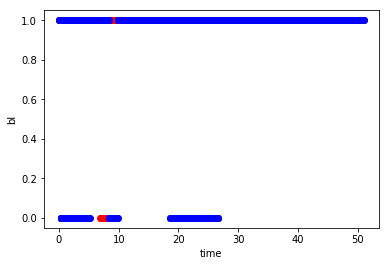

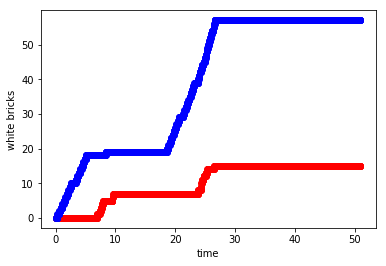

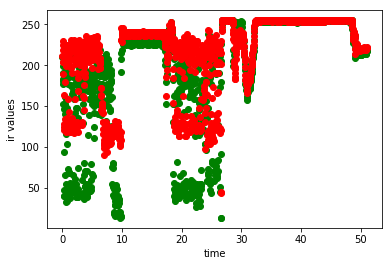

In [3]:
plt.plot(time_list,BRIR_list,'ro',time_list,BLIR_list,'bo')
plt.ylabel('bl')
plt.xlabel('time')
plt.show()

plt.plot(time_list,left_list,'ro',time_list,right_list,'bo')
plt.ylabel('white bricks')
plt.xlabel('time')
plt.show()

plt.plot(time_list,l_ir_list,'go',time_list,r_ir_list,'ro')
plt.ylabel('ir values')
plt.xlabel('time')
plt.show()